In [1]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve 
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('DatasetPerovskitasJuan.csv') #Aqui lo que se hace es cargar los datos.
df = df[df['Nsites'] == 5]
df = shuffle(df, random_state=2)
x = df.drop('Unnamed: 0', axis = 1)
x = x.drop('ID', axis = 1)
x = x.drop('full_formula', axis = 1)
x = x.drop('Energy', axis = 1)
x = x.drop('Energy_per_atom', axis = 1)
x = x.drop('Formation_energy_per_atom', axis = 1)
x = x.drop('E_above_hull', axis = 1)
x = x.drop("Band_gap",axis = 1) #Aqui quitamos la columna que correponde a la energia de gap
y = np.asarray(df['Band_gap']) #Aqui definimos la cantidad que deseamos predecir, en este caso la energia de gap
x = (x-x.mean())/x.std()
y = (y-y.mean())/y.std()
x = x.fillna(0)

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.1, random_state=9)

In [3]:
x

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
319,0.0,0.0,0.369585,-0.023219,1.812700,1.416400,-1.223313,1.660661,0.869263,2.393520,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.343234,1.688564
393,0.0,0.0,1.063688,0.936517,0.933242,-2.426015,0.606280,-0.364801,-0.540696,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.800962,1.446449
402,0.0,0.0,0.956903,0.936517,0.493513,-2.426015,0.637290,-0.364801,-0.599655,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.681801,0.852303
173,0.0,0.0,-0.271125,-0.023219,-0.825674,-0.563620,0.513250,-0.364801,-0.519639,-0.957835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.396926,-0.818418
82,0.0,0.0,-0.911835,-0.982955,0.493513,1.161546,-1.440383,-0.364801,1.340091,-0.607174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093551,-1.231077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.0,0.0,0.743333,0.936517,-0.385945,-0.269557,0.885370,-0.364801,-0.619027,0.458404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.720305,0.466307
51,0.0,0.0,-1.232190,-0.982955,-0.825674,-0.465599,-0.075941,-0.364801,-0.167571,-1.044789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.648997,-1.910700
159,0.0,0.0,0.689940,0.936517,-0.825674,-0.681245,1.133451,-0.364801,-0.926456,-0.665354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.605473,-0.228872
42,0.0,0.0,0.689940,0.936517,-0.825674,-0.681245,1.133451,-0.364801,-0.926456,-0.665354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.254372,-0.161394


In [7]:
for i in x.columns:
    print(i)

Nsites
Nelements
A Z
A Period_Number
A Group_Number
A Electronegativity
A Covalent_radius
A Valence_Electrons
A Ionization_Energy
A Electron_Afinity
A Block
A Volume
A Density
A Atomic_Weight
A Z.1
A Period_Number.1
A Group_Number.1
A Electronegativity.1
A Covalent_radius.1
A Valence_Electrons.1
A Ionization_Energy.1
A Electron_Afinity.1
A Block.1
A Volume.1
A Density.1
A Atomic_Weight.1
B Z
B Period_Number
B Group_Number
B Electronegativity
B Covalent_radius
B Valence_Electrons
B Ionization_Energy
B Electron_Afinity
B Block
B Volume
B Density
B Atomic_Weight
B2 Z
B2 Period_Number
B2 Group_Number
B2 Electronegativity
B2 Covalent_radius
B2 Valence_Electrons
B2 Ionization_Energy
B2 Electron_Afinity
B2 Block
B2 Volume
B2 Density
B2 Atomic_Weight
X1 Z
X1 Period_Number
X1 Group_Number
X1 Electronegativity
X1 Covalent_radius
X1 Valence_Electrons
X1 Ionization_Energy
X1 Electron_Afinity
X1 Block
X1 Volume
X1 Density
X1 Atomic_Weight
X2 Z
X2 Period_Number
X2 Group_Number
X2 Electronegativity
X

In [3]:
X_train

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
42,0.0,0.0,0.689940,0.936517,-0.825674,-0.681245,1.133451,-0.364801,-0.926456,-0.665354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.254372,-0.161394
322,0.0,0.0,-1.125405,-0.982955,-0.385945,0.593026,-0.572102,-0.364801,0.434652,-0.872778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.458655,1.088221
432,0.0,0.0,0.850118,0.936517,0.053784,-0.210745,0.761330,-0.364801,-0.717573,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.032795,-0.244505
579,0.0,0.0,-0.911835,-0.982955,0.493513,1.161546,-1.440383,-0.364801,1.340091,-0.607174,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.638649,1.736667
726,0.0,0.0,1.544220,0.936517,-0.385945,0.122526,-0.106951,-0.364801,0.432125,-1.122573,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.703057,1.386575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,0.0,0.0,-1.232190,-0.982955,-0.825674,-0.465599,-0.075941,-0.364801,-0.167571,-1.044789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041395,-1.727245
421,0.0,0.0,1.117080,0.936517,1.153107,-0.073516,0.544260,-0.364801,-0.136407,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.690899,1.061079
385,0.0,0.0,0.796725,0.936517,-0.166080,-0.230349,0.792340,-0.364801,-0.651034,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.740920,1.053383
125,0.0,0.0,-0.751657,-0.982955,1.153107,1.298776,-1.440383,-0.364801,1.191852,2.757145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.121752,-0.498248


In [4]:
X_test

,Nsites,Nelements,A Z,A Period_Number,A Group_Number,A Electronegativity,A Covalent_radius,A Valence_Electrons,A Ionization_Energy,A Electron_Afinity,...,X6 Covalent_radius,X6 Valence_Electrons,X6 Ionization_Energy,X6 Electron_Afinity,X6 Block,X6 Volume,X6 Density,X6 Atomic_Weight,volume-py,density-py
138,0.0,0.0,-1.232190,-0.982955,-0.825674,-0.465599,-0.075941,-0.364801,-0.167571,-1.044789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047067,-0.853058
292,0.0,0.0,-0.110947,-0.023219,-0.166080,0.710651,-0.448062,-0.364801,0.376535,1.697890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.063959,0.258558
382,0.0,0.0,1.117080,0.936517,1.153107,-0.073516,0.544260,-0.364801,-0.136407,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.787939,1.427621
659,0.0,0.0,0.316193,-0.023219,1.592836,1.063526,-1.130283,0.647930,-0.442993,-0.173986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.479936,0.832073
443,0.0,0.0,0.903510,0.936517,0.273649,-0.191141,0.699310,-0.364801,-0.662825,0.521643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.237007,-0.561787
379,0.0,0.0,-0.271125,-0.023219,-0.825674,-0.563620,0.513250,-0.364801,-0.519639,-0.957835,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.192814,-1.369923
604,0.0,0.0,-0.217732,-0.023219,-0.605809,-0.034307,0.358199,-0.364801,-0.077448,-0.151853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.540090,0.408282
333,0.0,0.0,0.743333,0.936517,-0.385945,-0.269557,0.885370,-0.364801,-0.619027,0.458404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.036215,-0.956546
111,0.0,0.0,0.689940,0.936517,-0.825674,-0.681245,1.133451,-0.364801,-0.926456,-0.665354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.458273,-0.496576
613,0.0,0.0,0.689940,0.936517,-0.825674,-0.681245,1.133451,-0.364801,-0.926456,-0.665354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.755086,-1.358742


<function matplotlib.pyplot.show(close=None, block=None)>

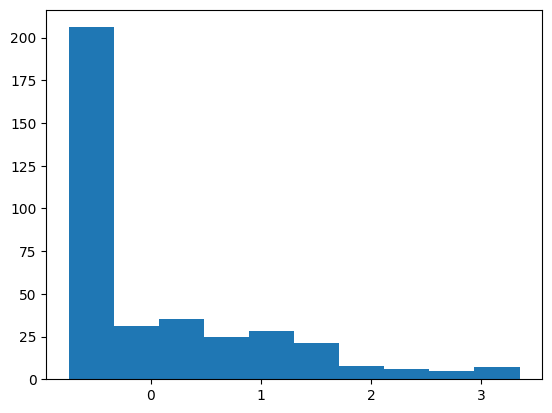

In [5]:
plt.hist(y, bins = 10)
plt.show

In [6]:
abr1 = GridSearchCV (AdaBoostRegressor (),{
    'random_state':[0,1,2], 'n_estimators':[1000], 'learning_rate':[0.001], 'loss': ['exponential']}, cv=5)
abr1.fit(X_train, y_train)
model = abr1.best_estimator_

Primero vemos las metricas
Model| R2 sq on train set: 0.6519
Model| R2 sq on test set: 0.5347
Model| MSE on test set: 0.5043
Model| MAE on test set: 0.5883
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

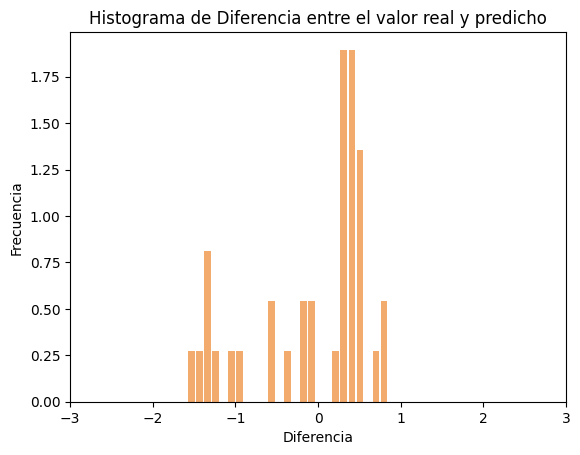

In [7]:
print('Primero vemos las metricas')
abr_score = model.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

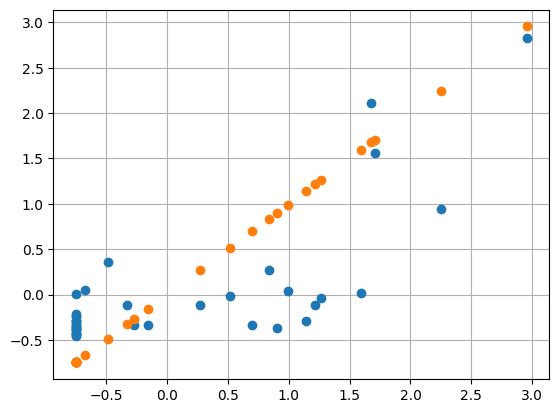

In [8]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [9]:
BR = GridSearchCV (linear_model.BayesianRidge(),{'tol':[1e-3]}, cv=5)
BR.fit(X_train, y_train) #Entrenamos el modelo
model1 = BR.best_estimator_ #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.5383
Model| R2 sq on test set: 0.5428
Model| MSE on test set: 0.4956
Model| MAE on test set: 0.5613
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

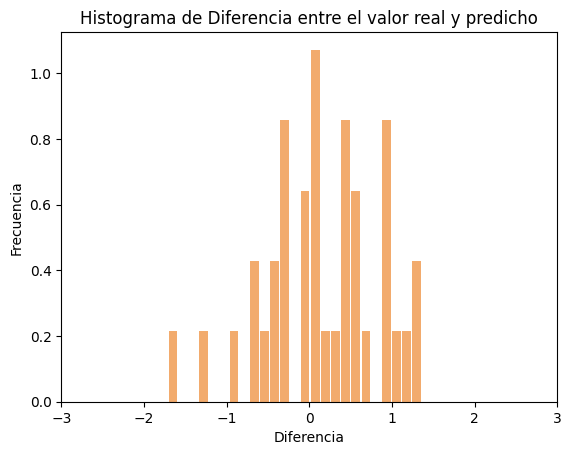

In [10]:
print('Primero vemos las metricas')
abr_score = model1.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model1.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model1.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

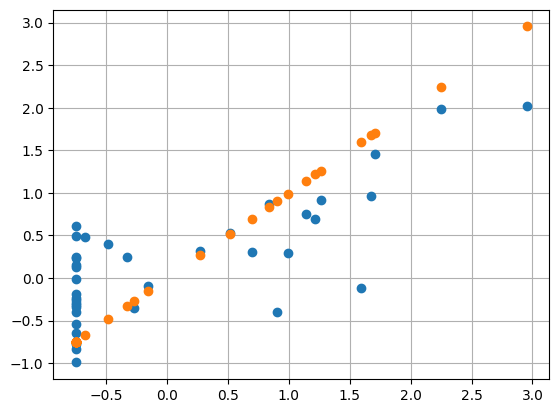

In [11]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [12]:
dtr1 = GridSearchCV (DecisionTreeRegressor(),{
    'criterion':['friedman_mse'], 'random_state':[0,1,2], 'splitter':['best'], 'max_depth':[None]}, cv=5, verbose = 3)
dtr1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model2 = dtr1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.412 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.365 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.018 total time=   0.0s
[CV 4/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.664 total time=   0.0s
[CV 5/5] END criterion=friedman_mse, max_depth=None, random_state=0, splitter=best;, score=0.152 total time=   0.0s
[CV 1/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.408 total time=   0.0s
[CV 2/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.441 total time=   0.0s
[CV 3/5] END criterion=friedman_mse, max_depth=None, random_state=1, splitter=best;, score=0.057 total time=   0.0s
[CV 4/5] END

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.5911
Model| MSE on test set: 0.4432
Model| MAE on test set: 0.3720
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

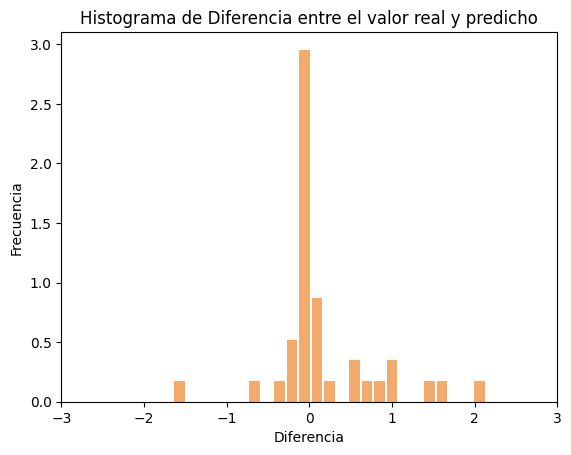

In [13]:
print('Primero vemos las metricas')
abr_score = model2.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model2.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model2.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

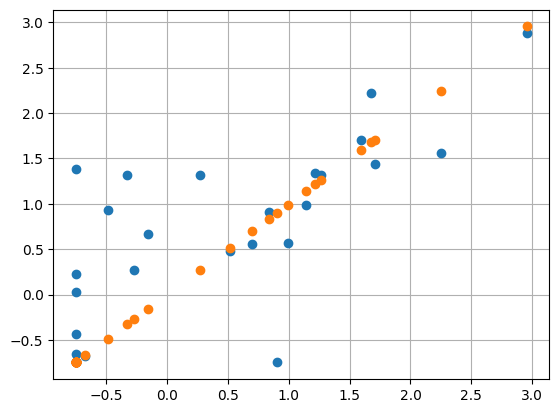

In [14]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [15]:
kernel = 15*RBF(1.0)+10*RBF(2.0)+5*RBF(3.0) #Definimos que tipo de kernel usar, en este caso uno contante de 15 y 2 tipo RBF
gpr1 = make_pipeline(StandardScaler(), GaussianProcessRegressor(kernel = kernel))
gpr1.fit(X_train, y_train) #Entrenamos el modelo
model3 = gpr1

c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k1__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Cronos\anaconda3\envs\kenai\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: -0.0023
Model| MSE on test set: 1.0864
Model| MAE on test set: 0.8986
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

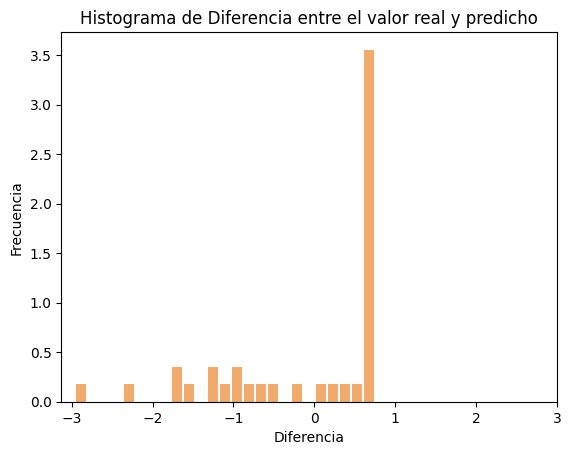

In [16]:
print('Primero vemos las metricas')
abr_score = model3.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model3.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model3.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

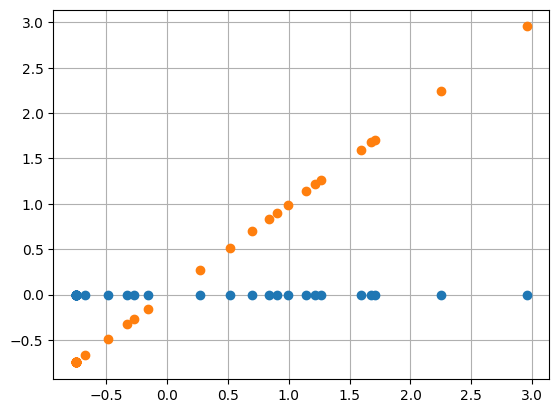

In [17]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [18]:
gbr = GridSearchCV(GradientBoostingRegressor (),{'n_estimators': [100,10,3], 'max_depth': [8], 'min_samples_split': [2], 'learning_rate': [0.1],
    'loss': ['squared_error'], 'random_state':[0,1,2]}, cv=5, verbose = 3)
#loss = 'ls', este es least squares
gbr.fit(X_train, y_train) #Entrenamos el modelo
model4 = gbr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.625 total time=   0.3s
[CV 2/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.484 total time=   0.3s
[CV 3/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.402 total time=   0.3s
[CV 4/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.775 total time=   0.3s
[CV 5/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=0;, score=0.366 total time=   0.3s
[CV 1/5] END learning_rate=0.1, loss=squared_error, max_depth=8, min_samples_split=2, n_estimators=100, random_state=1;, score=0.618 total time=   0.3s
[CV 2/5] END learning_rate=0

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.6710
Model| MSE on test set: 0.3566
Model| MAE on test set: 0.3436
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

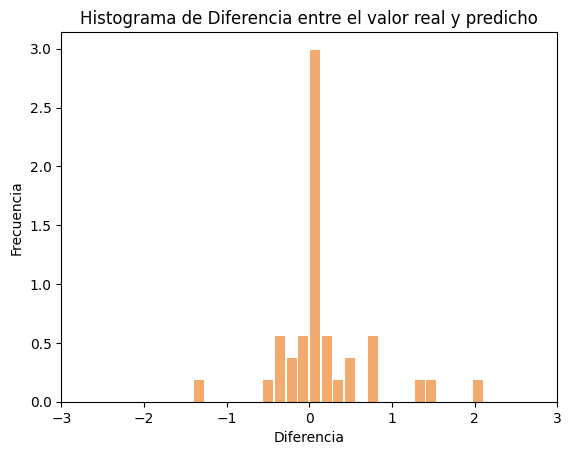

In [19]:
print('Primero vemos las metricas')
abr_score = model4.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model4.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model4.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

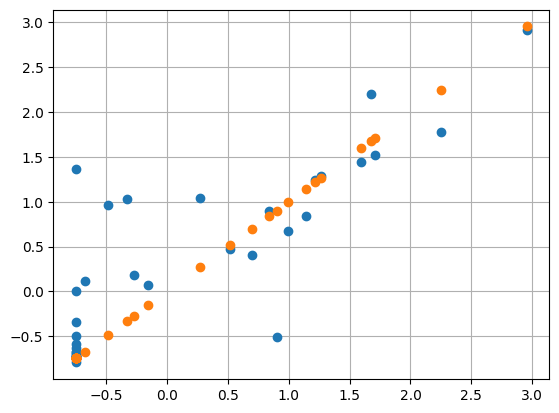

In [20]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [21]:
krr = GridSearchCV (KernelRidge (),{ 'alpha':[0.001],'kernel':['linear']}, cv=5,verbose=3)
krr.fit(X_train, y_train) #Entrenamos el modelo
model5 = krr.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........alpha=0.001, kernel=linear;, score=0.467 total time=   0.0s
[CV 2/5] END ........alpha=0.001, kernel=linear;, score=0.645 total time=   0.0s
[CV 3/5] END ........alpha=0.001, kernel=linear;, score=0.073 total time=   0.0s
[CV 4/5] END .......alpha=0.001, kernel=linear;, score=-1.798 total time=   0.0s
[CV 5/5] END ........alpha=0.001, kernel=linear;, score=0.025 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: 0.6210
Model| R2 sq on test set: 0.6216
Model| MSE on test set: 0.4101
Model| MAE on test set: 0.5080
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

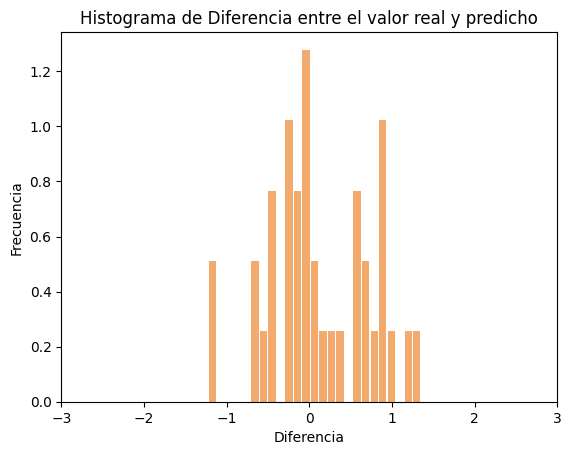

In [22]:
print('Primero vemos las metricas')
abr_score = model5.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model5.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model5.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

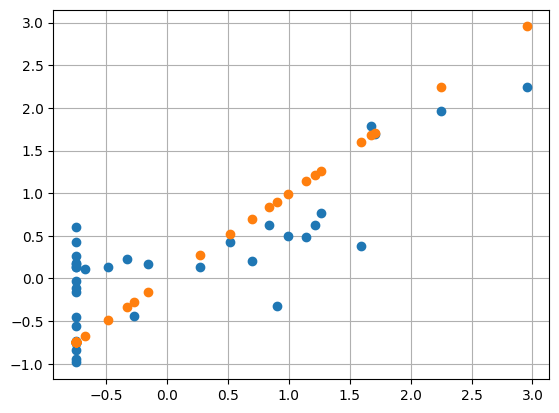

In [23]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [24]:
knr1 = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree')
knr1.fit(X_train, y_train)
model6 = knr1

Primero vemos las metricas
Model| R2 sq on train set: 1.0000
Model| R2 sq on test set: 0.1832
Model| MSE on test set: 0.8853
Model| MAE on test set: 0.6575
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

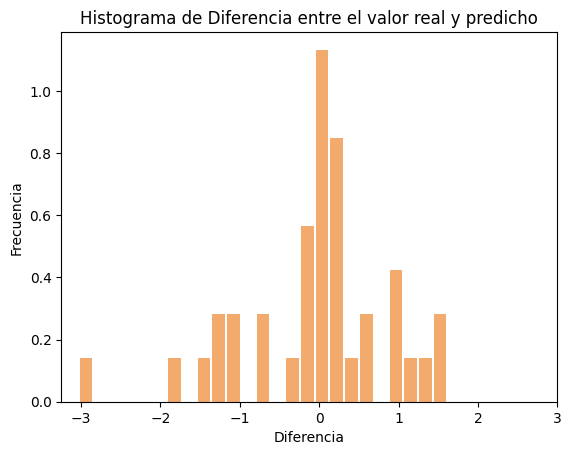

In [25]:
print('Primero vemos las metricas')
abr_score = model6.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model6.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model6.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

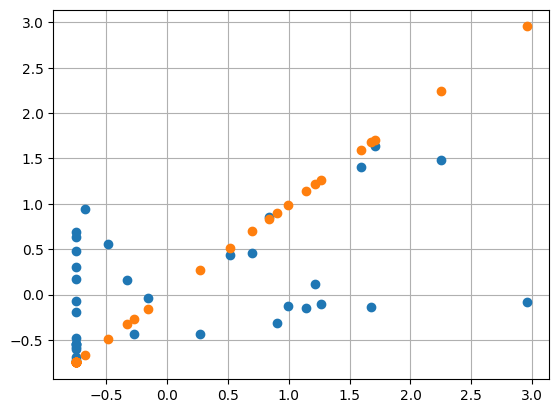

In [26]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [27]:
par = GridSearchCV (PassiveAggressiveRegressor(),{'max_iter':[1000], 'random_state':[10], 'tol':[1e-10]},
                   cv=5,verbose = 3)
#loss = 'ls', este es least squares
par.fit(X_train, y_train) #Entrenamos el modelo
model7 = par.best_estimator_ #Nos quedamos con el mejor modelo

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.980 total time=   0.0s
[CV 2/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.396 total time=   0.0s
[CV 3/5] END max_iter=1000, random_state=10, tol=1e-10;, score=-0.180 total time=   0.0s
[CV 4/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.087 total time=   0.0s
[CV 5/5] END max_iter=1000, random_state=10, tol=1e-10;, score=0.182 total time=   0.0s


Primero vemos las metricas
Model| R2 sq on train set: -0.3457
Model| R2 sq on test set: -0.0743
Model| MSE on test set: 1.1644
Model| MAE on test set: 0.8948
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

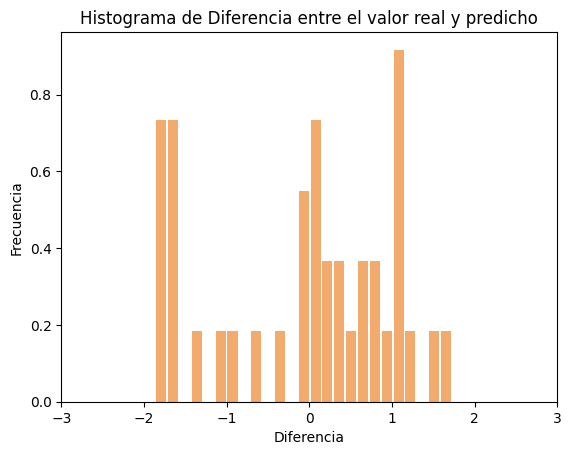

In [28]:
print('Primero vemos las metricas')
abr_score = model7.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model7.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model7.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

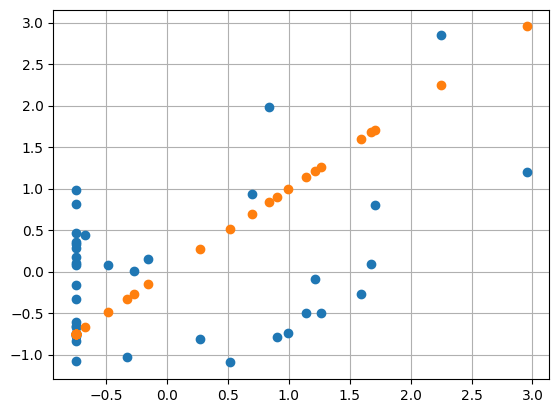

In [29]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [30]:
grid1 = GridSearchCV (RandomForestRegressor(),{'max_depth':[100], 'random_state':[0,1,2], 'criterion':['squared_error']
                                             }, cv=5, refit=True, verbose=3)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model8 = grid1.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.628 total time=   0.3s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.745 total time=   0.4s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.536 total time=   0.4s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.773 total time=   0.4s
[CV 5/5] END criterion=squared_error, max_depth=100, random_state=0;, score=0.494 total time=   0.4s
[CV 1/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.638 total time=   0.5s
[CV 2/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.731 total time=   0.5s
[CV 3/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.541 total time=   0.6s
[CV 4/5] END criterion=squared_error, max_depth=100, random_state=1;, score=0.776 total time=   0.5s
[CV 5/5] END criterion=squared_

Primero vemos las metricas
Model| R2 sq on train set: 0.9549
Model| R2 sq on test set: 0.7268
Model| MSE on test set: 0.2961
Model| MAE on test set: 0.3834
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

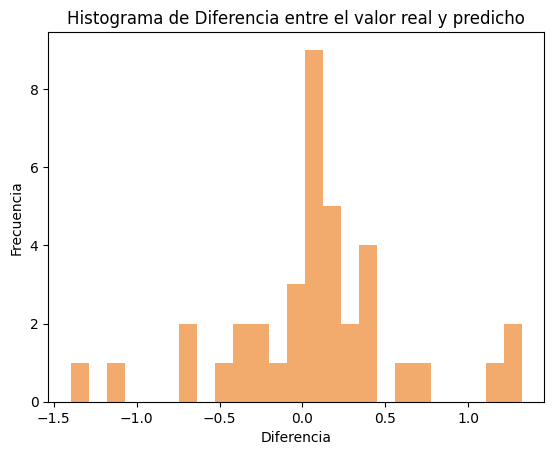

In [48]:
print('Primero vemos las metricas')
abr_score = model8.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model8.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model8.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D')
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
#plt.xticks(range(-3,4))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

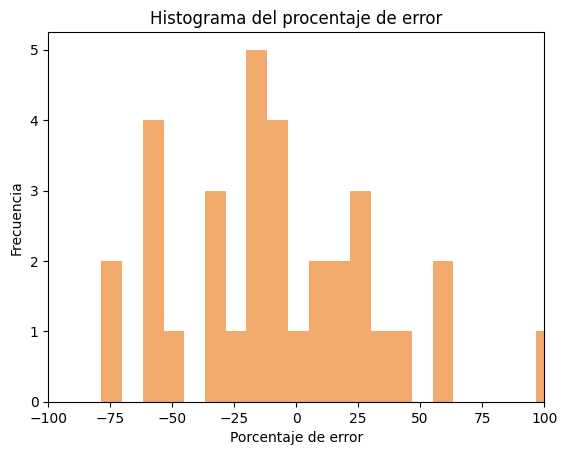

In [47]:
dif1 = (abs(yt - yp) / yt)*100
plt.hist(x=dif1, bins=50, color='#F2AB6D')
plt.title('Histograma del procentaje de error')
plt.xlabel('Porcentaje de error')
plt.ylabel('Frecuencia')
plt.xlim(-100,100)
#plt.xticks(range(-100,101,10))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

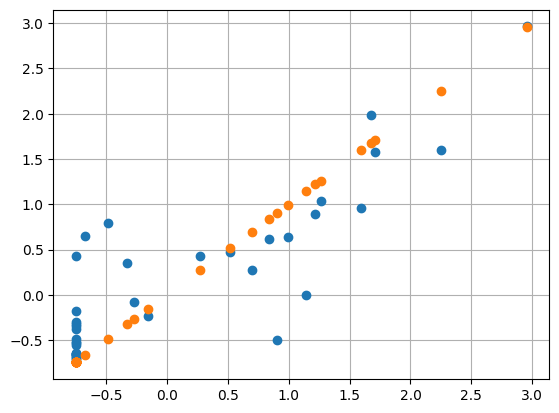

In [32]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [33]:
sgd = (make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000,tol=1e-1500,alpha=0.0001,epsilon=0.0001)))
sgd.fit(X_train, y_train) #Entrenamos el modelo
model9 = sgd #Nos quedamos con el mejor modelo

Primero vemos las metricas
Model| R2 sq on train set: 0.5148
Model| R2 sq on test set: 0.5133
Model| MSE on test set: 0.5276
Model| MAE on test set: 0.5793
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

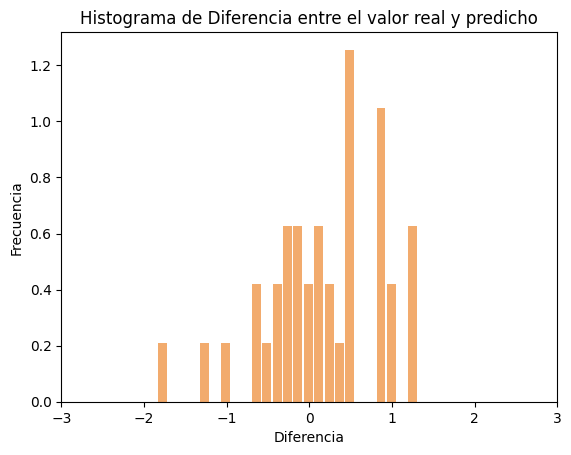

In [34]:
print('Primero vemos las metricas')
abr_score = model9.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model9.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model9.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

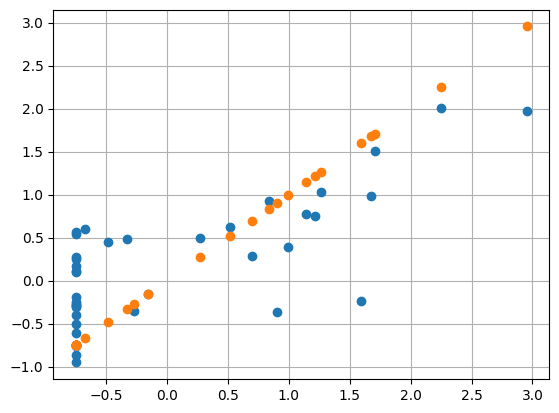

In [35]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show

In [36]:
steps1 = [('scaler', StandardScaler()), ('SVM', SVR())]
pipeline1 = Pipeline(steps1) 
grid1 = GridSearchCV(pipeline1, param_grid= {'SVM__C':[100], 'SVM__gamma':['auto'], 'SVM__kernel': ['rbf'],
                                           'SVM__epsilon':[0.001]},cv = 5, refit=True,verbose=3, n_jobs = -1)
grid1.fit(X_train,y_train)
#Aqui lo que hacemos es quedarnos con el mejor metodo, el que da mejores resultados, lo llamamos en este caso: model1
model10 = grid1.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Primero vemos las metricas
Model| R2 sq on train set: 0.9003
Model| R2 sq on test set: 0.5960
Model| MSE on test set: 0.4379
Model| MAE on test set: 0.4639
Ahora lo que vemos son la diferencia entre el valor real y el predicho


<function matplotlib.pyplot.show(close=None, block=None)>

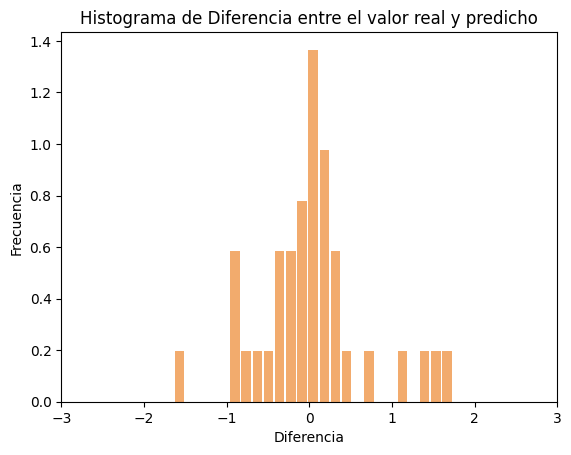

In [37]:
print('Primero vemos las metricas')
abr_score = model10.score(X_train,y_train) #Se evalua que tan bien entredo 
abr_score1 = model10.score(X_test,y_test) #Que tan bueno es en el conjunto de test
y_predicted = model10.predict(X_test) #Hacemos la inferencia con el conjunto test
yp = y_predicted# * sb + mb
yt = y_test #* sb + mb
print('Model| R2 sq on train set: %.4f'% abr_score)  #Mostramos las metricas que se obtuvieron.
print('Model| R2 sq on test set: %.4f'% abr_score1)
print('Model| MSE on test set: %.4f'% mean_squared_error(yt, yp))
print('Model| MAE on test set: %.4f'% mean_absolute_error(yt, yp))   

print('Ahora lo que vemos son la diferencia entre el valor real y el predicho')
dif = yp-yt
plt.hist(x=dif, bins=25, color='#F2AB6D', rwidth=0.85, density = True)
plt.title('Histograma de Diferencia entre el valor real y predicho')
plt.xlabel('Diferencia')
plt.ylabel('Frecuencia')
plt.xticks(range(-3,4))
plt.show

Lo que vemos es el valor predicho y el real


<function matplotlib.pyplot.show(close=None, block=None)>

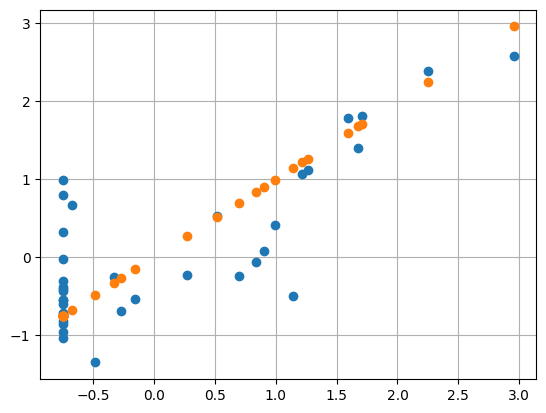

In [38]:
print('Lo que vemos es el valor predicho y el real')
plt.plot(yt,yp,'o')
plt.plot(y_test,y_test,'o')
plt.grid()
plt.show